# **Clasificación de presencia de Cardiopatía**

En esta etapa, se busca predecir si un paciente presenta Cardiopatía.

1. Preparación de Datos
2. División de los datos 70-30
3. Aprendizaje del Modelo: Tree, Knn, NN, SVM, RandomForest
4. Evaluación del Modelo: matriz de confusion, P,R, ROC
5. Guardar el modelo


# 1. Preparación de Datos

In [138]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

In [139]:
#Cargamos los datos preparados, resultado de archivo Calidad_de_Datos.ipynb
data = pd.read_csv("Heart_Disease_Predictio_READY.csv")
data.head()

,Unnamed: 0,Age,Sex,Chest pain type,Cholesterol,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,322,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,564,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,261,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,263,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,269,2,121,1,0.2,1,1,3,Absence


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   EKG results              270 non-null    int64  
 6   Max HR                   270 non-null    int64  
 7   Exercise angina          270 non-null    int64  
 8   ST depression            270 non-null    float64
 9   Slope of ST              270 non-null    int64  
 10  Number of vessels fluro  270 non-null    int64  
 11  Thallium                 270 non-null    int64  
 12  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(11), object(1)
memory usage: 27.6+ KB


In [141]:
# Pasamos variables numericas a categoricas.
data['Sex']=data['Sex'].astype('category')
data['Chest pain type']=data['Chest pain type'].astype('category')
data['EKG results']=data['EKG results'].astype('category')
data['Exercise angina']=data['Exercise angina'].astype('category')
data['Slope of ST']=data['Slope of ST'].astype('category')
data['Number of vessels fluro']=data['Number of vessels fluro'].astype('category')
data['Thallium']=data['Thallium'].astype('category')
data['Heart Disease']=data['Heart Disease'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Unnamed: 0               270 non-null    int64   
 1   Age                      270 non-null    int64   
 2   Sex                      270 non-null    category
 3   Chest pain type          270 non-null    category
 4   Cholesterol              270 non-null    int64   
 5   EKG results              270 non-null    category
 6   Max HR                   270 non-null    int64   
 7   Exercise angina          270 non-null    category
 8   ST depression            270 non-null    float64 
 9   Slope of ST              270 non-null    category
 10  Number of vessels fluro  270 non-null    category
 11  Thallium                 270 non-null    category
 12  Heart Disease            270 non-null    category
dtypes: category(8), float64(1), int64(4)
memory usage: 13.9 KB


In [142]:
# Eliminar variable Unnamed:0
data = data.drop('Unnamed: 0',axis=1)
data.head()

,Age,Sex,Chest pain type,Cholesterol,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,322,2,109,0,2.4,2,3,3,Presence
1,67,0,3,564,2,160,0,1.6,2,0,7,Absence
2,57,1,2,261,0,141,0,0.3,1,0,7,Presence
3,64,1,4,263,0,105,1,0.2,2,1,7,Absence
4,74,0,2,269,2,121,1,0.2,1,1,3,Absence


In [143]:
data.head()

,Age,Sex,Chest pain type,Cholesterol,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,322,2,109,0,2.4,2,3,3,Presence
1,67,0,3,564,2,160,0,1.6,2,0,7,Absence
2,57,1,2,261,0,141,0,0.3,1,0,7,Presence
3,64,1,4,263,0,105,1,0.2,2,1,7,Absence
4,74,0,2,269,2,121,1,0.2,1,1,3,Absence


<Axes: xlabel='Heart Disease'>

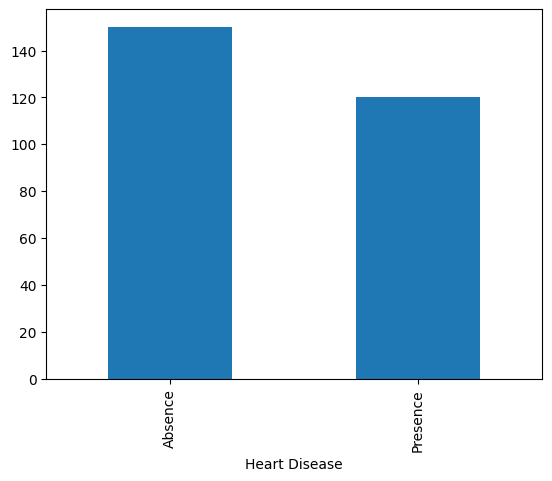

In [144]:
#Descripción variable Objetivo
data['Heart Disease'].value_counts().plot(kind='bar')

In [145]:
#Se crean dummies a las variables predictoras categóricas (no a la variable obj)
# Copia del dataset
df = data.copy()

# Variable objetivo
target = 'Heart Disease'

# 1. Seleccionar columnas categóricas (excluyendo la target)
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols = [col for col in cat_cols if col != target]

# 2. Identificar variables con 2 categorías y con más de 2
two_cat_cols = [col for col in cat_cols if df[col].nunique() == 2]
multi_cat_cols = [col for col in cat_cols if df[col].nunique() > 2]

print("Columnas con 2 categorías:", two_cat_cols)
print("Columnas con más de 2 categorías:", multi_cat_cols)

# 3. Crear dummies:
# - A las de 2 categorías se les hace drop_first
# - A las de más de 2 categorías no

df_two = pd.get_dummies(df[two_cat_cols], drop_first=True, dtype=int)
df_multi = pd.get_dummies(df[multi_cat_cols], drop_first=False, dtype=int)

# 4. Eliminar las columnas categóricas originales
df.drop(cat_cols, axis=1, inplace=True)

# 5. Unir todo de nuevo
data = pd.concat([df, df_two, df_multi], axis=1)

# 6. Verificar
data.info()
data.head()

Columnas con 2 categorías: ['Sex', 'Exercise angina']
Columnas con más de 2 categorías: ['Chest pain type', 'EKG results', 'Slope of ST', 'Number of vessels fluro', 'Thallium']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        270 non-null    int64   
 1   Cholesterol                270 non-null    int64   
 2   Max HR                     270 non-null    int64   
 3   ST depression              270 non-null    float64 
 4   Heart Disease              270 non-null    category
 5   Sex_1                      270 non-null    int64   
 6   Exercise angina_1          270 non-null    int64   
 7   Chest pain type_1          270 non-null    int64   
 8   Chest pain type_2          270 non-null    int64   
 9   Chest pain type_3          270 non-null    int64   
 10  Chest pain type_4          27

,Age,Cholesterol,Max HR,ST depression,Heart Disease,Sex_1,Exercise angina_1,Chest pain type_1,Chest pain type_2,Chest pain type_3,...,Slope of ST_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_0,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_3,Thallium_6,Thallium_7
0,70,322,109,2.4,Presence,1,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
1,67,564,160,1.6,Absence,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
2,57,261,141,0.3,Presence,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,64,263,105,0.2,Absence,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,74,269,121,0.2,Absence,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0


In [146]:
#Se codifican las categorias de la VARIABLE OBJETIVO (Cambiar Absence y Presence por 0 y 1)

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["Heart Disease"]=labelencoder.fit_transform(data["Heart Disease"]) #Objetivo

data.head()

,Age,Cholesterol,Max HR,ST depression,Heart Disease,Sex_1,Exercise angina_1,Chest pain type_1,Chest pain type_2,Chest pain type_3,...,Slope of ST_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_0,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_3,Thallium_6,Thallium_7
0,70,322,109,2.4,1,1,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
1,67,564,160,1.6,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
2,57,261,141,0.3,1,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,64,263,105,0.2,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,74,269,121,0.2,0,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0


# 2. División 70-30

<Axes: xlabel='Heart Disease'>

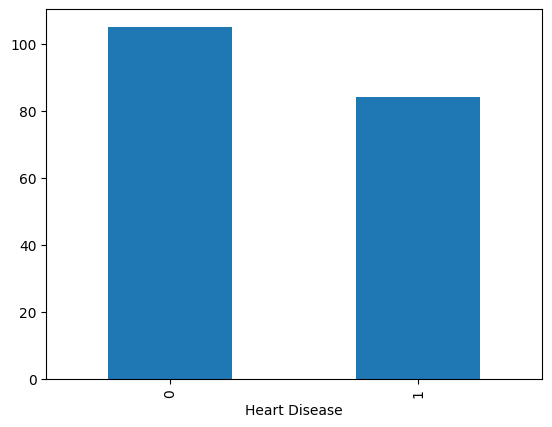

In [147]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("Heart Disease", axis = 1) # Variables predictoras
Y = data['Heart Disease'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)
Y_train.value_counts().plot(kind='bar')

<Axes: xlabel='Heart Disease'>

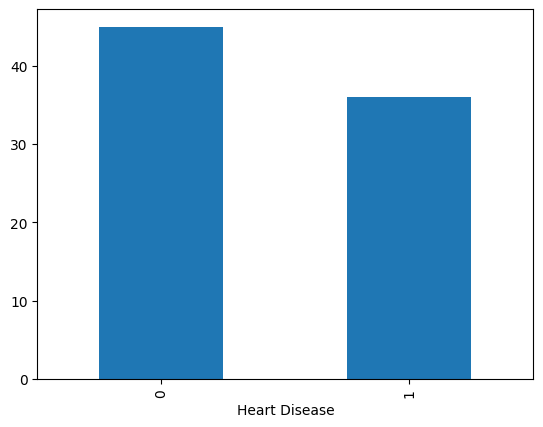

In [148]:
#Variable objetivo del 30%
Y_test.value_counts().plot(kind='bar')

# **3. Aprendizaje con el 70% y Evaluación con el 30%**

In [149]:
#Dataframe para comparar los resultados
medidas= pd.DataFrame(index=['F1-score'])

# Tree

In [150]:
#Creación del modelo con el conjunto de entrenamiento
from sklearn.tree import DecisionTreeClassifier #DecisionTreeRegressor

modelTree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, max_depth=None) #gini, entropy
modelTree.fit(X_train, Y_train) #70% train

DecisionTreeClassifier(min_samples_leaf=2)

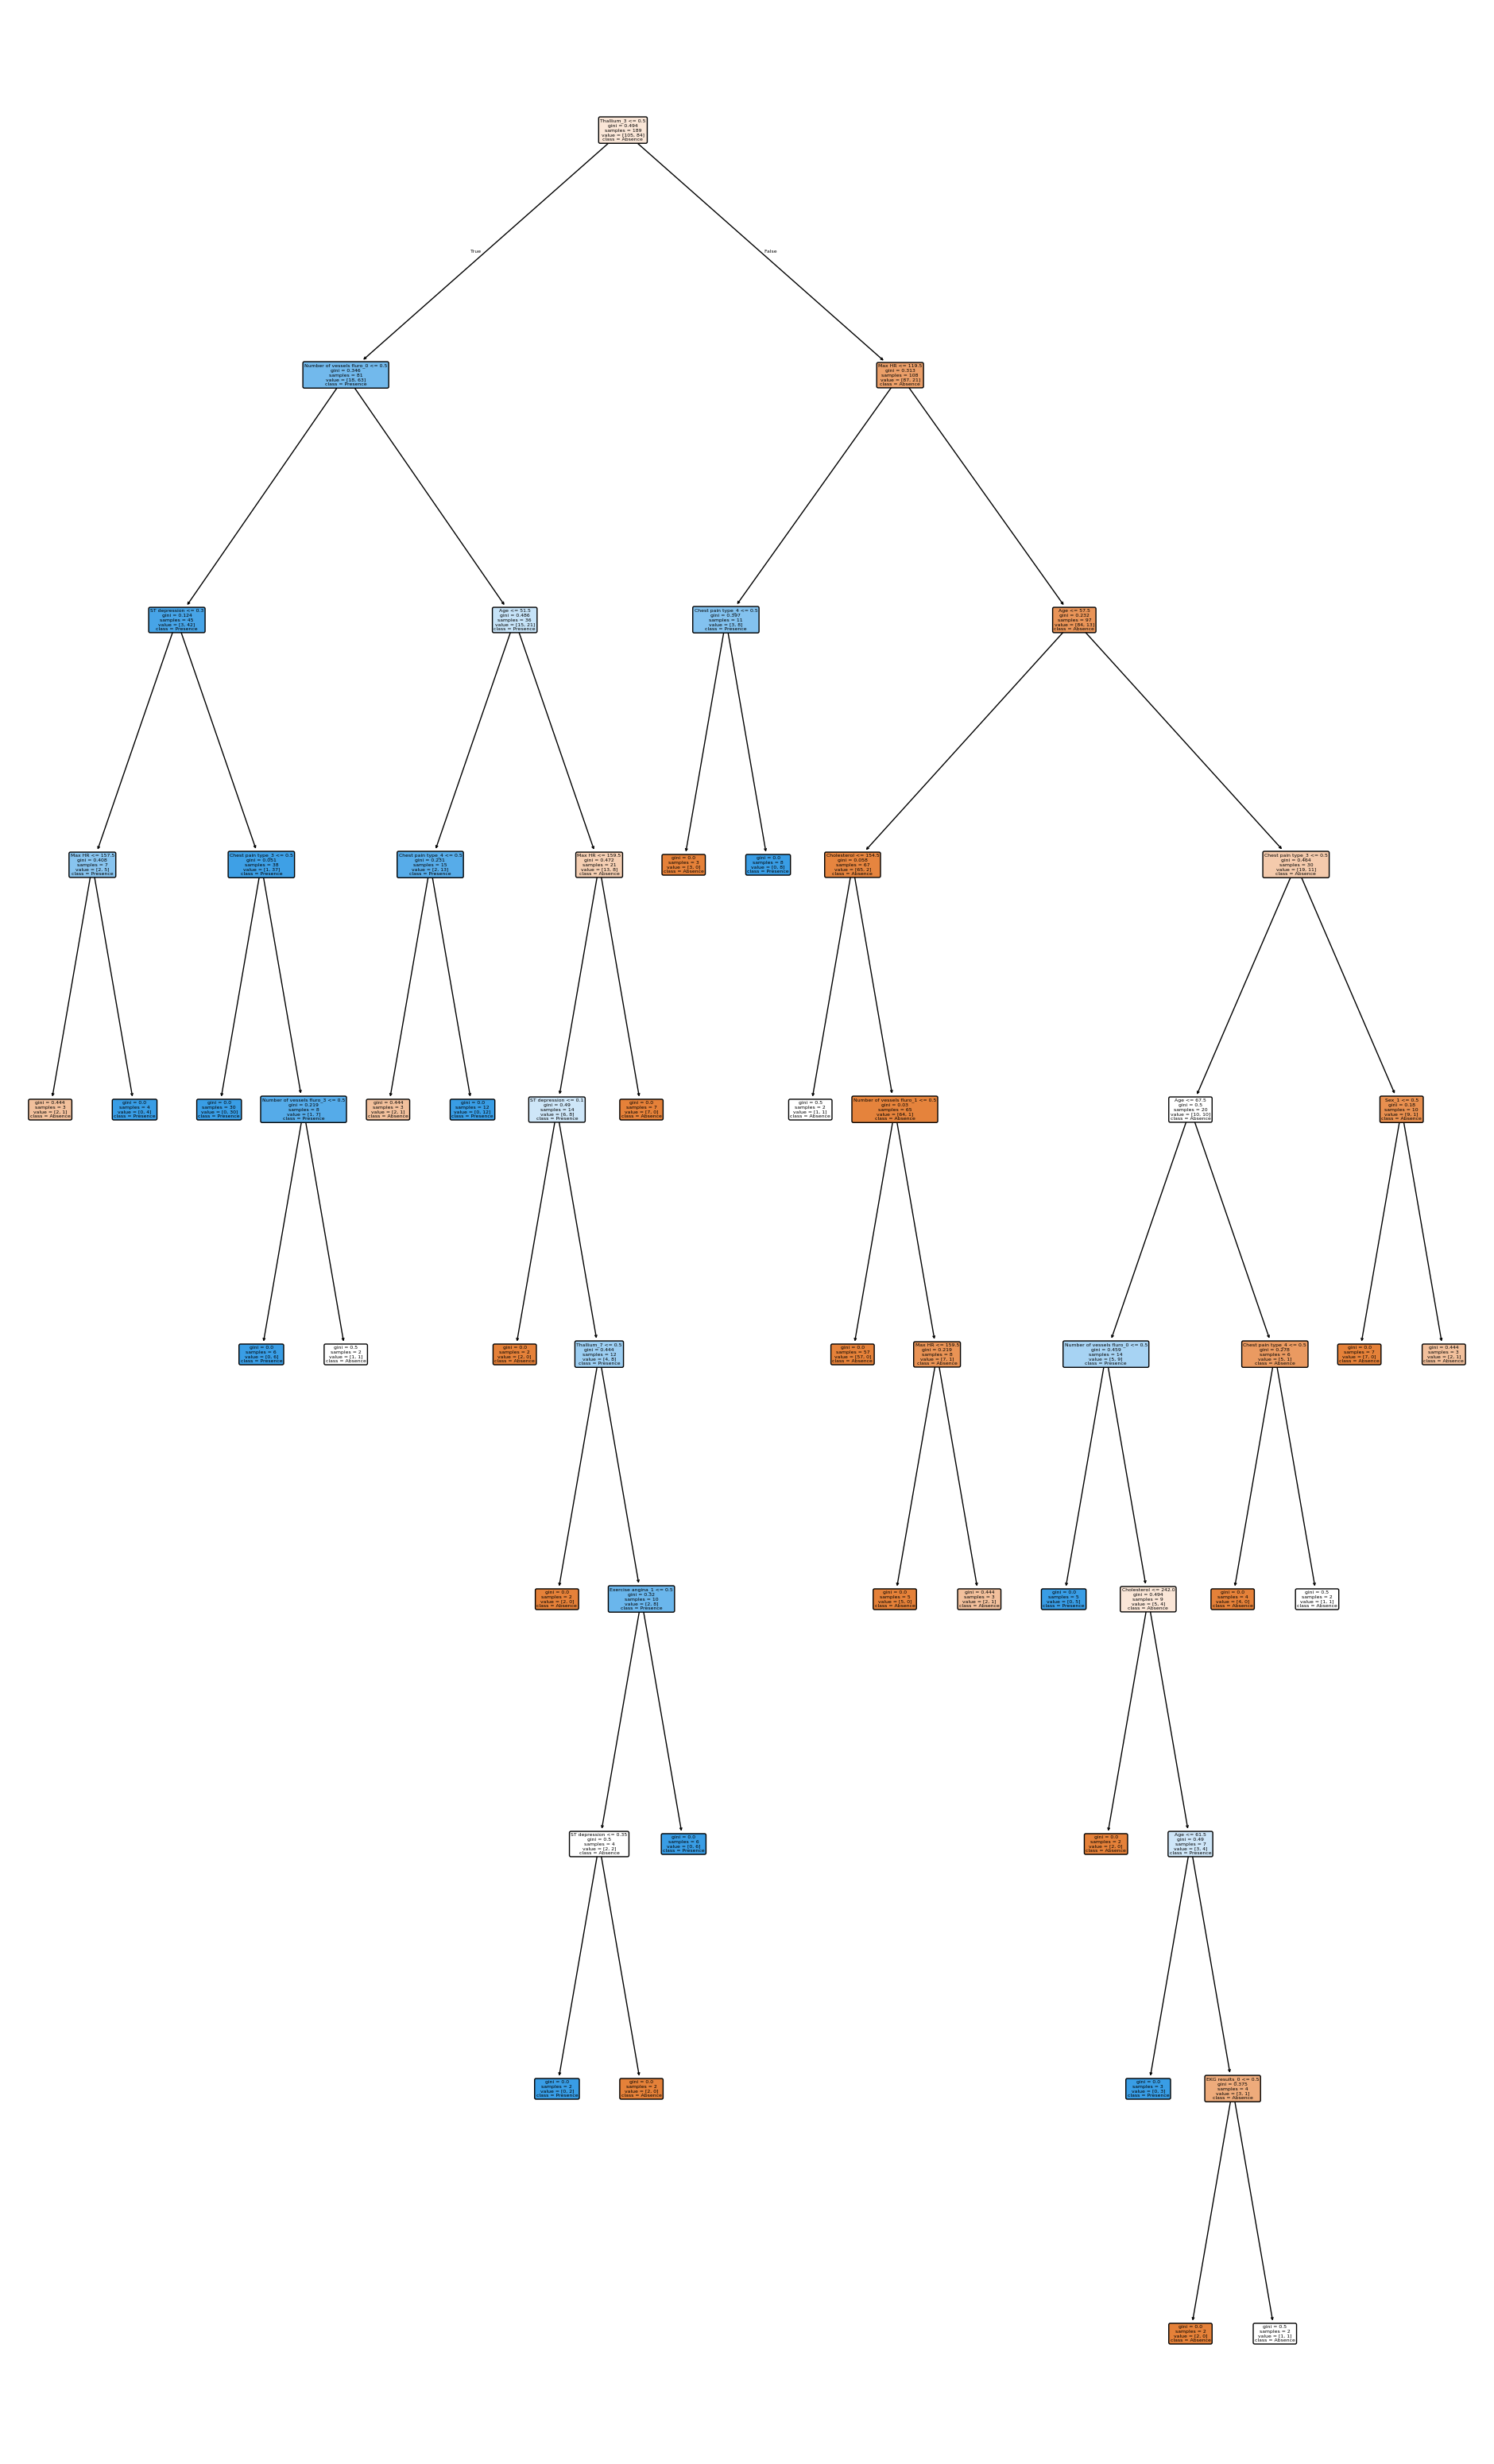

In [151]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,40))
plot_tree(modelTree, feature_names=X_train.columns.values, class_names=labelencoder.classes_, rounded=True, filled=True)
plt.show()

In [152]:
#Evaluación 30%
from sklearn import metrics

Y_pred = modelTree.predict(X_test) #30% Test
print(Y_pred)

[1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0
 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0
 1 0 1 1 0 1 0]


In [153]:
#Exactitud
exactitud=metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred)
print(exactitud)

0.7283950617283951


In [154]:
#Matriz de confusion
from sklearn import metrics

cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
cm

array([[34, 11],
       [11, 25]])

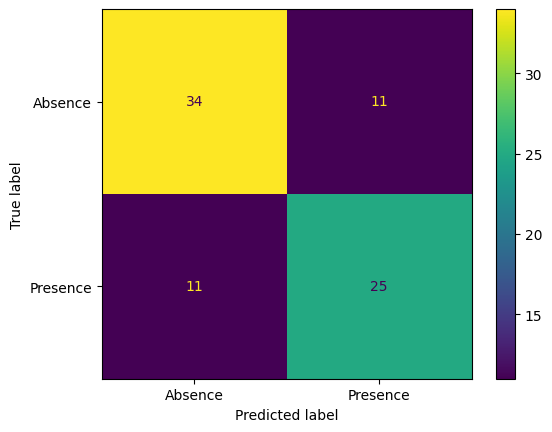

In [155]:
#Plot de la matriz de confusion
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

In [156]:
#Precision, Recall, f1, exactitud (REPORTE COMPLETO)
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

              precision    recall  f1-score   support

     Absence       0.76      0.76      0.76        45
    Presence       0.69      0.69      0.69        36

    accuracy                           0.73        81
   macro avg       0.72      0.72      0.72        81
weighted avg       0.73      0.73      0.73        81



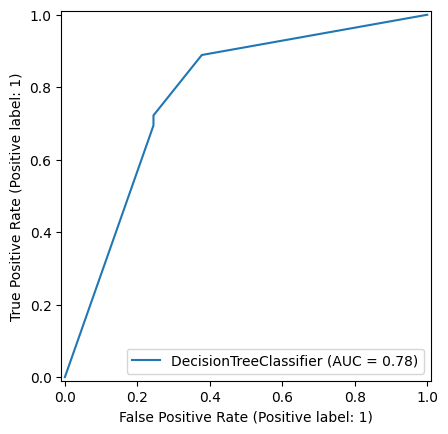

In [157]:
metrics.RocCurveDisplay.from_estimator(modelTree,X_test, Y_test)

In [158]:
from sklearn.metrics import f1_score
# Calcular el F1-Score
F1 = f1_score(Y_test, Y_pred)

# Almacenar el F1-Score en el dataframe medidas
medidas['Tree'] = [F1]

print(medidas)

              Tree
F1-score  0.694444


# Random Forest

In [159]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf= RandomForestClassifier(n_estimators=100,  max_samples=0.7, criterion='gini',
                              max_depth=None, min_samples_leaf=2) #max debe estar entre el 60-90%
model_rf.fit(X_train, Y_train) #70%

RandomForestClassifier(max_samples=0.7, min_samples_leaf=2)

              precision    recall  f1-score   support

     Absence       0.81      0.87      0.84        45
    Presence       0.82      0.75      0.78        36

    accuracy                           0.81        81
   macro avg       0.82      0.81      0.81        81
weighted avg       0.82      0.81      0.81        81



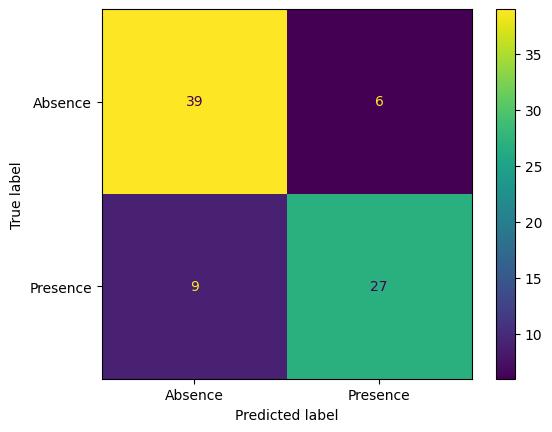

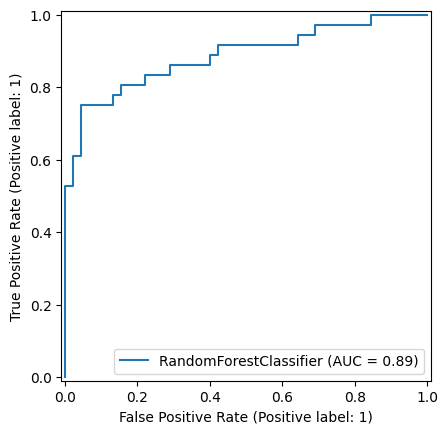

In [160]:
#Evaluación de RandomForest con 30%
from sklearn import metrics

Y_pred = model_rf.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(model_rf,X_test, Y_test)

In [161]:
from sklearn.metrics import f1_score
# Calcular el F1-Score
F1 = f1_score(Y_test, Y_pred)

# Almacenar el F1-Score en el dataframe medidas
medidas['Random Forest'] = [F1]

print(medidas)

              Tree  Random Forest
F1-score  0.694444       0.782609


# Knn

- Normalizar

In [162]:
X_train.head()

,Age,Cholesterol,Max HR,ST depression,Sex_1,Exercise angina_1,Chest pain type_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,...,Slope of ST_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_0,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_3,Thallium_6,Thallium_7
59,62,281,103,1.4,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
23,47,204,143,0.1,1,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
24,54,288,159,0.0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
127,52,196,169,0.1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
123,65,360,151,0.8,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0


In [163]:
#Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data[['Age','Cholesterol', 'Max HR', 'ST depression']]) #Ajuste de los parametros sobre 100% de los datos (data): max - min

#Se aplica la normalización a 70%  y 30%
X_train[['Age','Cholesterol', 'Max HR', 'ST depression']]= min_max_scaler.transform(X_train[['Age','Cholesterol', 'Max HR', 'ST depression']]) #70%
X_test[['Age','Cholesterol', 'Max HR', 'ST depression']]= min_max_scaler.transform(X_test[['Age','Cholesterol', 'Max HR', 'ST depression']]) #30%
X_train.head()

,Age,Cholesterol,Max HR,ST depression,Sex_1,Exercise angina_1,Chest pain type_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,...,Slope of ST_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_0,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_3,Thallium_6,Thallium_7
59,0.687500,0.353881,0.244275,0.225806,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
23,0.375000,0.178082,0.549618,0.016129,1,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
24,0.520833,0.369863,0.671756,0.000000,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
127,0.479167,0.159817,0.748092,0.016129,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
123,0.750000,0.534247,0.610687,0.129032,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0


In [164]:
#Aprendizaje KNN con 70%
from sklearn.neighbors  import KNeighborsClassifier #KNeighborsRegressor

modelKnn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')#euclidean, minkowski
modelKnn.fit(X_train, Y_train) #70%

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

              precision    recall  f1-score   support

     Absence       0.80      0.73      0.77        45
    Presence       0.70      0.78      0.74        36

    accuracy                           0.75        81
   macro avg       0.75      0.76      0.75        81
weighted avg       0.76      0.75      0.75        81



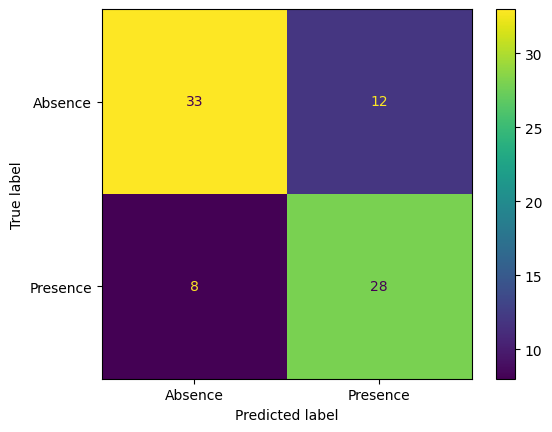

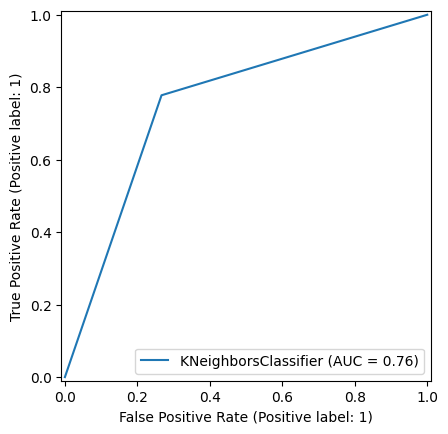

In [165]:
#Evaluación de Knn con 30%
from sklearn import metrics

Y_pred = modelKnn.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelKnn,X_test, Y_test)

In [166]:
from sklearn.metrics import f1_score

# Calcular el F1-Score
F1 = f1_score(Y_test, Y_pred)

# Almacenar el F1-Score en el dataframe medidas
medidas['KNN'] = [F1]

print(medidas)

              Tree  Random Forest       KNN
F1-score  0.694444       0.782609  0.736842


# Red Neuronal

- normalizar

In [167]:
#Red Neuronal

from sklearn.neural_network import MLPClassifier #MLPRegressor

#Solo se configura capas ocultas, no se configura capa de entrada y de salida
#activation -> función activación de la oculta: sigmoid, logistic, linear
#hidden_layer_sizes=5,7 -> dos capas ocultas con 5 neuronas y 7 neuronas
#learning_rate-> tamaño del paso constante o decreciente (constant, adaptive)
#learning_rate_init-> valor tasa de aprendizaje
#momentum-> valor momentum
#max_iter-> iteaciones
#random_state-> semilla para generacion numeros seudoaletorios
modelNN = MLPClassifier(activation="relu",hidden_layer_sizes=(20), learning_rate='adaptive', #constant
                     learning_rate_init=0.2, momentum= 0.5, max_iter=500, random_state=3)

modelNN.fit(X_train, Y_train) #70% normalizados

MLPClassifier(hidden_layer_sizes=20, learning_rate='adaptive',
              learning_rate_init=0.2, max_iter=500, momentum=0.5,
              random_state=3)

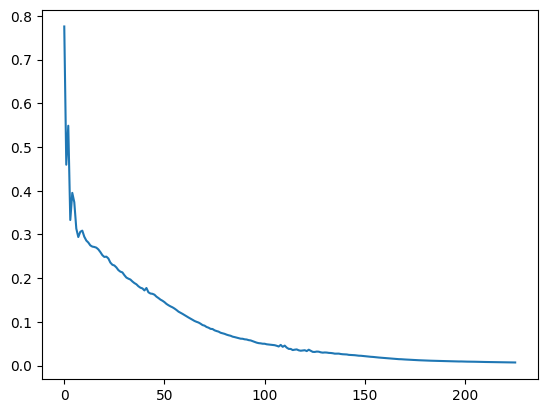

In [168]:
#Loss es la desviación entre Y_train y el Y_pred
loss_values = modelNN.loss_curve_
plt.plot(loss_values)

              precision    recall  f1-score   support

     Absence       0.82      0.73      0.78        45
    Presence       0.71      0.81      0.75        36

    accuracy                           0.77        81
   macro avg       0.77      0.77      0.76        81
weighted avg       0.77      0.77      0.77        81



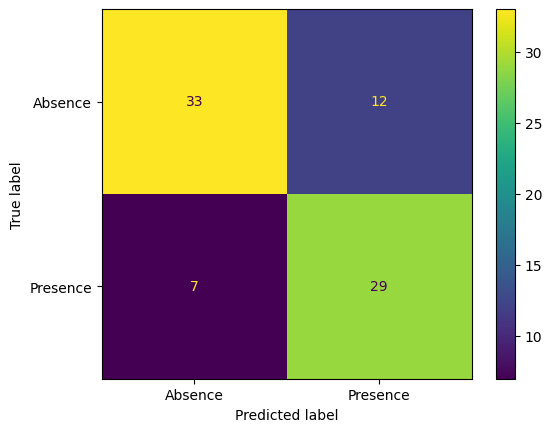

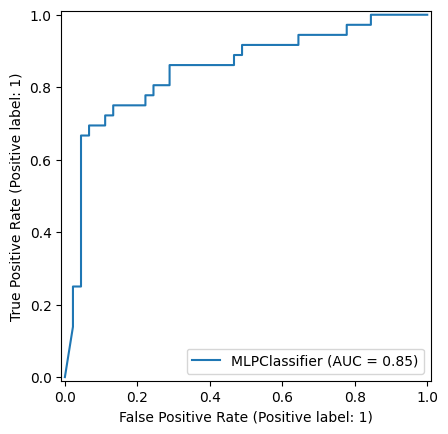

In [169]:
#Evaluación de Red Neuronal
from sklearn import metrics

Y_pred = modelNN.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelNN,X_test, Y_test)

In [170]:
from sklearn.metrics import f1_score

y_pred_nn = (Y_pred > 0.5).astype(int)  # Umbral para convertir a 0/1

# Calcular el F1-Score
F1 = f1_score(Y_test, y_pred_nn)

# Almacenar el F1-Score en el dataframe medidas
medidas['Red Neuronal'] = [F1]

print(medidas)

              Tree  Random Forest       KNN  Red Neuronal
F1-score  0.694444       0.782609  0.736842      0.753247


# SVM

- normalizar

In [171]:
#SVM
from sklearn.svm import SVC # SVR

modelSVM = SVC(kernel='linear', probability=True) #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
modelSVM.fit(X_train, Y_train) #70%

SVC(kernel='linear', probability=True)

              precision    recall  f1-score   support

     Absence       0.84      0.80      0.82        45
    Presence       0.76      0.81      0.78        36

    accuracy                           0.80        81
   macro avg       0.80      0.80      0.80        81
weighted avg       0.80      0.80      0.80        81



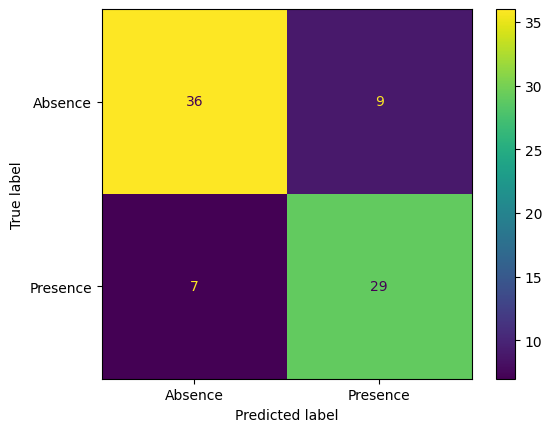

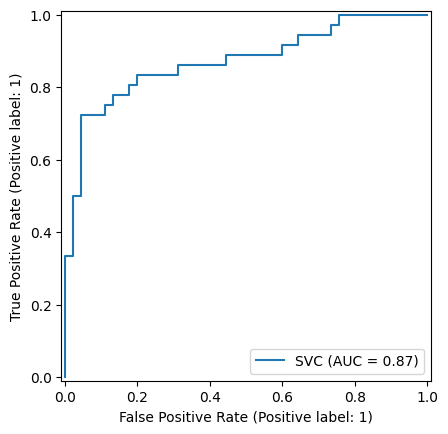

In [172]:
#Evaluación de SVM
from sklearn import metrics

Y_pred = modelSVM.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelSVM,X_test, Y_test)

In [173]:
from sklearn.metrics import f1_score


# Calcular el F1-Score
F1 = f1_score(Y_test, Y_pred)

# Almacenar el F1-Score en el dataframe medidas
medidas['SVM'] = [F1]

print(medidas)

              Tree  Random Forest       KNN  Red Neuronal       SVM
F1-score  0.694444       0.782609  0.736842      0.753247  0.783784


# **Conclusión sobre las medidas de evaluación de los modelos**

Para evaluar el desempeño de los diferentes modelos de clasificación implementados, se utilizó como métrica principal el F1-Score, la cual resulta adecuada en escenarios donde es fundamental encontrar un equilibrio entre la precisión y la sensibilidad.

Los resultados obtenidos muestran diferencias significativas entre los modelos evaluados. El Árbol de Decisión obtuvo un F1-Score de 0.714, evidenciando un desempeño adecuado, aunque limitado frente a modelos más robustos. Por su parte, Random Forest (0.777) y KNN (0.775) presentaron mejoras notables, reflejando una mayor capacidad de generalización frente a patrones complejos en los datos. La Red Neuronal alcanzó un resultado superior (0.831), demostrando un comportamiento más preciso en la clasificación de los registros.

Finalmente, el modelo SVM (Support Vector Machine) se posiciona como el mejor clasificador dentro de este análisis, logrando el F1-Score más alto (0.873). Esto indica que el SVM consigue un balance óptimo entre la identificación correcta de casos positivos y la reducción de errores, convirtiéndose en la alternativa más eficiente para este problema en particular.

En conclusión, tras evaluar y comparar los modelos bajo una métrica confiable y acorde al contexto, el modelo **SVM** se establece como la opción con mayor rendimiento y precisión para la tarea de clasificación propuesta.

In [174]:
# Guardar Metodo SVM para Parametrización
import pickle

# Nombre del archivo a guardar
filename = 'modelo-SVM.pkl'

# Obtener las variables del modelo entrenado
variables = X.columns._values

# Guardar modelo, escalador, columnas y label encoder
pickle.dump([modelSVM, min_max_scaler, variables, labelencoder], open(filename, 'wb'))

print("Modelo SVM guardado correctamente!")

✅ Modelo SVM guardado correctamente!
